# The Bakery

Import libraries and data. Check the data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [6]:
bakery = pd.read_csv('./data/BreadBasket_DMS.csv')
bakery.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


Set the hour column and set a dataframe with just the top 10 items

In [67]:
bakery['Hour']=bakery['Time'].apply(lambda x: x.split(':')[0])
topItems = bakery['Item'].value_counts().head(10).index.tolist()
bakeryTop = bakery[bakery['Item'].isin(topItems)]

Lets have a look at the top 10 items charted out

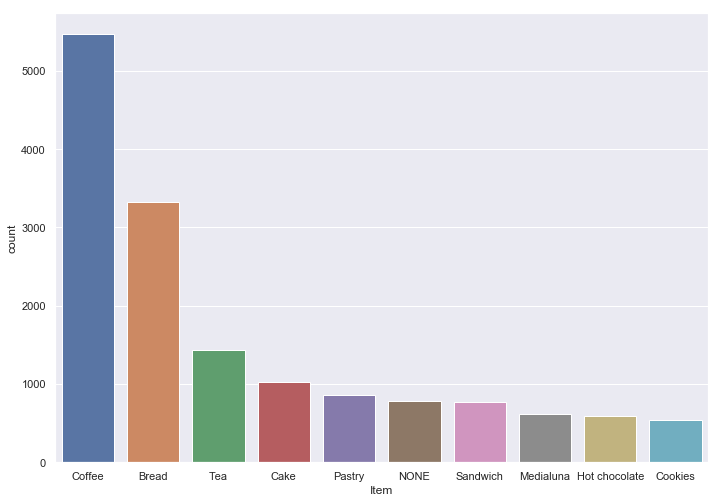

In [72]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x='Item',data=bakeryTop,order=bakeryTop['Item'].value_counts().index)

In [47]:
pvt=bakeryTop.pivot_table(bakery, index='Item', columns=['Hour'], fill_value=0, aggfunc={'Item': 'count'})

In [48]:
pvt

Item                                                           \
Hour            01  07   08   09   10   11   12   13   14   15   16  17  18   
Item                                                                          
Bread            1   2  171  400  508  528  474  340  341  310  196  46   6   
Cake             0   0    8   40   83  133  127  124  182  174  124  30   0   
Coffee           0  13  199  583  820  946  740  607  636  519  321  69  11   
Cookies          0   0   12   39   77   78   67   61   49   77   59  20   1   
Hot chocolate    0   0    9   56   76   91   56   51   68   89   71  14   4   
Medialuna        0   6   43  120  125  108   55   36   48   34   25  11   4   
NONE             0   1   24   79   97  114  167  159   96   32   13   4   0   
Pastry           0   2   57  191  203  151   97   48   49   32   16   8   2   
Sandwich         0   0    5   17   20   53  162  234  171   75   29   4   1   
Tea              0   0   21  103  156  176  183  181  233  207  126  41   5   

                        
Hour          19 20 21  
Item                    
Bread          2  0  0  
Cake           0  0  0  
Coffee         6  1  0  
Cookies        0  0  0  
Hot chocolate  3  0  2  
Medialuna      1  0  0  
NONE           0  0  0  
Pastry         0  0  0  
Sandwich       0  0  0  
Tea            3  0  0

Afternoon tea? We can see by plotting a heat map the most likely breakfast components but we can also see a slight peak in tea purchases in the afternoon.

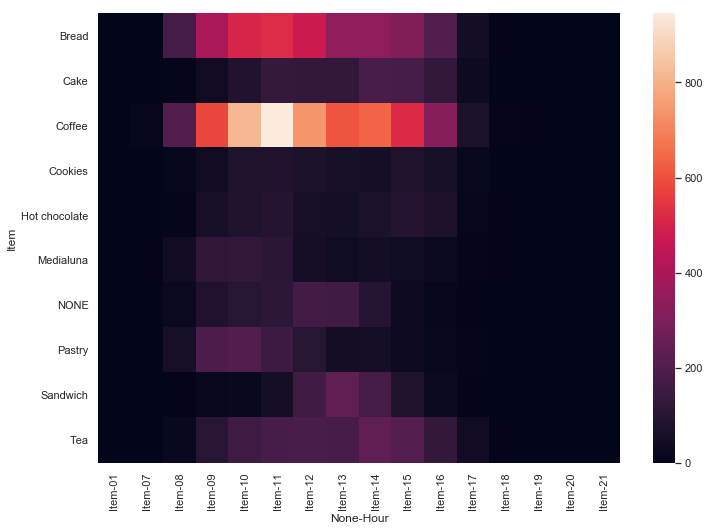

In [49]:
sns.heatmap(pvt)

In [59]:
df = bakery['Transaction'].value_counts().to_frame()['Transaction'].value_counts().to_frame(name='Occurrences')

In [63]:
df['Items'] = df.index

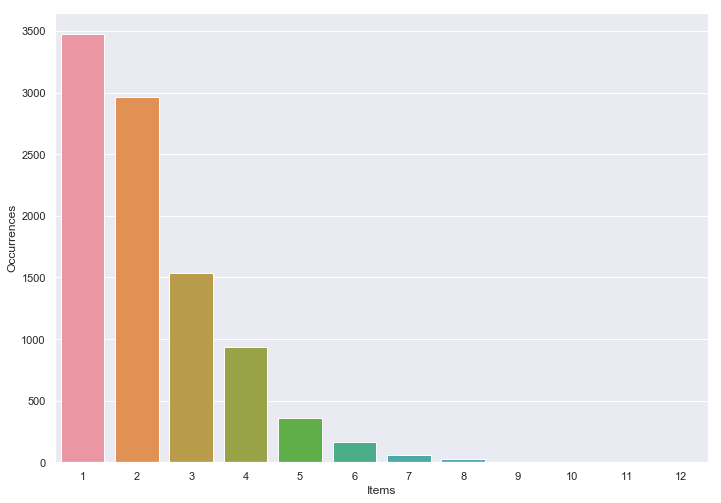

In [69]:
sns.barplot(data=df, x='Items', y='Occurrences')

In [125]:
# df = bakery['Transaction'].value_counts().to_frame()['Transaction'].value_counts().to_frame(name='Occurrences')
transCount = bakery.groupby(['Transaction', 'Hour']).size().to_frame(name='Count')
transCount.reset_index(inplace=True)
transCount.head()

,Transaction,Hour,Count
0,1,09,1
1,2,10,2
2,3,10,3
3,4,10,1
4,5,10,3


In [132]:
pvt2=transCount.pivot_table(transCount, index='Count', columns=['Hour'], fill_value=0, aggfunc={'count'})

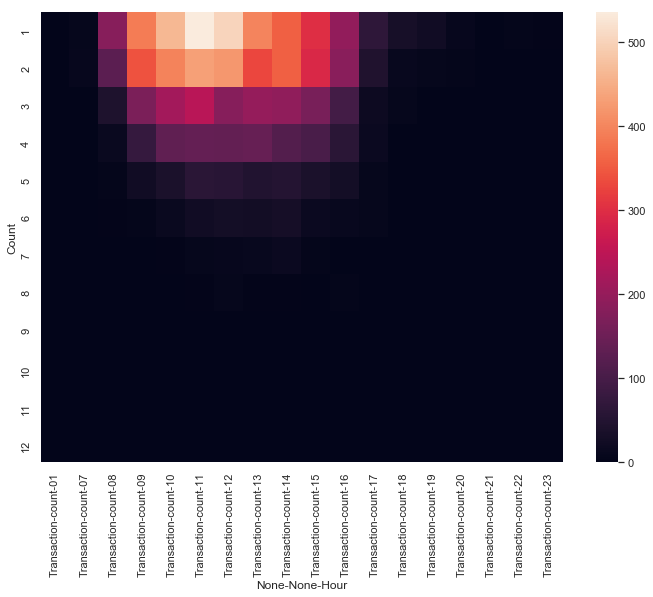

In [133]:
sns.heatmap(pvt2)